In [ ]:
# This program performs deep feature extraction using modified FCQ based mRMR approach

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mrmr import mrmr_classif
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification
from sklearn.svm import SVC
import numpy as np 
import pandas as pd

In [ ]:
#Network = 'VGG19'
Network = 'ResNet50'

if Network == 'VGG19':
    base_model = VGG19(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    num_features = 4096
elif Network == 'ResNet50':
    base_model = ResNet50(weights='imagenet')
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)
    num_features = 2048

count = 0
dirList = []    #Empty directory list
feature_list = []
yList = []

# basepath = 'C:\\Users\\asadu\\Downloads\\Chula-ParasiteEgg-11\\Chula-ParasiteEgg-11\\Chula-ParasiteEgg-11\\data'              #   DS-1
basepath = 'C:\\Users\\asadu\\Downloads\\Chula-ParasiteEgg-11\\Chula-ParasiteEgg-11\\Chula-ParasiteEgg-11\\CROPPED\\RESIZED'    #   DS-3
for entry in os.listdir(basepath):
    if os.path.isdir(os.path.join(basepath, entry)):
        dirList.append(os.path.join(basepath, entry)) 

while (count < len(dirList)):
    for filename in os.listdir(dirList[count]):
        os.path.join(dirList[count], filename)        
        str = os.path.join(dirList[count], filename)
        img_path = os.path.join(dirList[count], filename)          
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)                
        feature_list.append(features)  
        yList.extend([count])  
    count += 1

In [ ]:
df_y = pd.DataFrame(yList)

# Writing all features to an Excel file
arr = np.asarray(feature_list)
#newarr = arr.reshape(len(feature_list), 1*4096) # Reshaping from (10, 1, 4096) to (10, 4096) because df accepts 2-d array - For Alexnet
newarr = arr.reshape(len(feature_list), 1*2048) # Reshaping from (10, 1, 4096) to (10, 4096) because df accepts 2-d array - For Resnet50
df = pd.DataFrame(newarr)
data = pd.concat((df, df_y), axis='columns')
data.to_excel(excel_writer = Network+"DS3-All-Features.xlsx", index=False, header=False)      

In [ ]:
print(arr.shape)

In [ ]:
# Split dataset into training set and test set
y = data.iloc[:, -1]
X = data.iloc[:, :-1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y) # 80% training and 20% test
#   print(ytrain)

In [ ]:
# using mRMR technique to obtain feature indices
mRMR = mrmr_classif(Xtrain, ytrain, K = 600)
pd.DataFrame(mRMR).to_excel(excel_writer='DS-3_SelectedFeatures.xlsx')

In [ ]:
Accuracy = []
#   Forming dataframes of the selected features using indices from mRMR
#   Complete dataset has been used, because prediction will not work with a few features in Xtrain vs all features in Xtest
select_X = X.iloc[:, mRMR[0]]

for j in range(1, len(mRMR)):
    sel = X.iloc[:, mRMR[j]]
    select_X = pd.concat([select_X, sel], axis=1)

    #   Splitting into new train and test sets, using selected features only
    Xtrain, Xtest, ytrain, ytest = train_test_split(select_X, y, test_size=0.2, random_state=2022, stratify=y) # 80% training and 20% test

    # SVM
    modelSVC = SVC(kernel='poly', degree=3)
    modelSVC.fit(Xtrain, ytrain.ravel())
    pred_y = modelSVC.predict(pd.DataFrame(Xtest))
    Accuracy.append(accuracy_score(ytest, pred_y))        

In [28]:
print(np.argmax(Accuracy))
print(Accuracy[581])

581
0.93


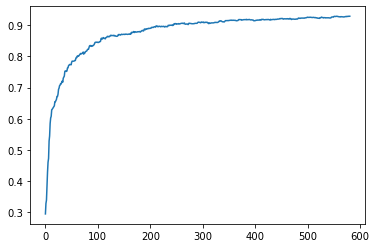

In [29]:
import matplotlib.pyplot as plt
("Accuracy = {:.5f}".format(accuracy_score(ytest, pred_y)))
# print(Accuracy)
plt.plot(Accuracy[0:581])

In [34]:
#print(Accuracy)
print(modelSVC.predict_proba(Xtest))

[0.29409090909090907, 0.3277272727272727, 0.3381818181818182, 0.3859090909090909, 0.42772727272727273, 0.46, 0.4722727272727273, 0.5281818181818182, 0.5445454545454546, 0.5845454545454546, 0.6022727272727273, 0.6077272727272728, 0.6286363636363637, 0.6304545454545455, 0.6331818181818182, 0.6363636363636364, 0.6386363636363637, 0.6413636363636364, 0.6545454545454545, 0.6545454545454545, 0.6586363636363637, 0.6618181818181819, 0.6713636363636364, 0.6713636363636364, 0.6786363636363636, 0.6940909090909091, 0.6981818181818182, 0.7063636363636364, 0.7077272727272728, 0.7127272727272728, 0.7118181818181818, 0.7163636363636363, 0.7209090909090909, 0.7172727272727273, 0.73, 0.7336363636363636, 0.7368181818181818, 0.7518181818181818, 0.7536363636363637, 0.7527272727272727, 0.7518181818181818, 0.7531818181818182, 0.7627272727272727, 0.7631818181818182, 0.77, 0.7722727272727272, 0.774090909090909, 0.7736363636363637, 0.7736363636363637, 0.7731818181818182, 0.7813636363636364, 0.785, 0.78454545454